# Desempenho dos alunos em exames 


## 1 - Leitura de dados com pandas:

In [93]:
# importando as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd

#Aluno: Jeferson da Silva Almeida - RA: 621101924

In [94]:
# lendo o arquivo csv
df_students = pd.read_csv('/home/Student_Performance.csv')

In [95]:
# exibindo informações do csv
print(df_students)

     Unnamed: 0 race/ethnicity  ... writing score percentage sex
0             0        group B  ...                     0.74   F
1             1        group C  ...                     0.88   F
2             2        group B  ...                     0.93   F
3             3        group A  ...                     0.44   M
4             4        group C  ...                     0.75   M
..          ...            ...  ...                      ...  ..
995         995        group E  ...                     0.95   F
996         996        group C  ...                     0.55   M
997         997        group C  ...                     0.65   F
998         998        group D  ...                     0.77   F
999         999        group D  ...                     0.86   F

[1000 rows x 9 columns]


## 2 - Manipulação e limpeza de dados com pandas:

**COLUNAS DO DATAFRAME**: raça/etnia, nível de educação dos pais, almoço, curso  de preparação para o teste, porcentagem de matemática, porcentagem de pontuação de leitura, porcentagem de pontuação de escrita e sexo.

In [96]:
# exibindo o cabeçalho do dataframe
df_students.head(5)

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,4,group C,some college,standard,none,0.76,0.78,0.75,M


**TIPOS** DE **DADOS** E **DETALHES** DAS COLUNAS

In [97]:
# exibindo informações do dataframe
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math percentage              1000 non-null   float64
 6   reading score percentage     1000 non-null   float64
 7   writing score percentage     1000 non-null   float64
 8   sex                          1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


**DELETANDO** A COLUNA **LUNCH**

In [9]:
#deletando a coluna lunch "almoço" do dataframe, pois não iremos utilizá-la
df_students.drop(['lunch'], axis = 1, inplace = True)  
df_students.head(5)

,Unnamed: 0,race/ethnicity,parental level of education,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,none,0.72,0.72,0.74,F
1,1,group C,some college,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,none,0.47,0.57,0.44,M
4,4,group C,some college,none,0.76,0.78,0.75,M


**ORDENANDO** AS **COLUNAS** POR **NÍVEL DE EDUCAÇÃO** DOS **PAIS**

In [98]:
# ordenação por level of education "educação dos pais" que frequentaram alguma escola
df_students.sort_values(by = ["parental level of education"], ascending = False)

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
546,546,group A,some high school,standard,completed,0.92,1.00,0.97,F
265,265,group D,some high school,free/reduced,none,0.59,0.42,0.41,M
223,223,group D,some high school,standard,none,0.86,0.80,0.75,M
222,222,group C,some high school,free/reduced,none,0.55,0.65,0.62,F
722,722,group B,some high school,free/reduced,completed,0.74,0.90,0.88,F
...,...,...,...,...,...,...,...,...,...
606,606,group C,associate's degree,standard,none,0.85,0.84,0.82,F
310,310,group B,associate's degree,standard,none,0.73,0.76,0.80,F
826,826,group C,associate's degree,free/reduced,completed,0.56,0.68,0.70,F
313,313,group C,associate's degree,free/reduced,completed,0.68,0.67,0.69,F


In [99]:
# categorias e quantidades por level of education "educação dos pais"
df_students["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

## 3 - Descritivo e exploração de dados com pandas (groupbys):

**AGRUPANDO** AS **MÉDIAS** DOS GRUPOS ATRAVÉS DA **RAÇA/ETNIA** 

In [100]:
# média das notas obtidas pelos alunos em matemática, leitura e escrita
df_students.groupby('race/ethnicity')['math percentage', 'reading score percentage', 'writing score percentage'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,math percentage,reading score percentage,writing score percentage
race/ethnicity,,,
group A,0.616292,0.646742,0.626742
group B,0.634526,0.673526,0.656000
group C,0.644639,0.691034,0.678276
group D,0.673626,0.700305,0.701450
group E,0.738214,0.730286,0.714071


In [103]:
# analisando as maiores e menores notas em porcentagem matemática, porcentagem de pontuação de leitura e porcentagem de pontuação de escrita
df_students.groupby('race/ethnicity').agg({'math percentage' : ['min', 'max'], 'reading score percentage' : ['min', 'max'],  'writing score percentage' : ['min', 'max']})

math percentage        ... writing score percentage      
                           min   max  ...                      min   max
race/ethnicity                        ...                               
group A                   0.28  1.00  ...                     0.19  0.97
group B                   0.08  0.97  ...                     0.15  0.96
group C                   0.00  0.98  ...                     0.10  1.00
group D                   0.26  1.00  ...                     0.32  1.00
group E                   0.30  1.00  ...                     0.22  1.00

[5 rows x 6 columns]

**QUANTIDADE** DE ESTUDANTES: **MASCULINOS** E **FEMININOS** 

In [104]:
# quantidade de meninas e meninos
df_students.groupby('sex')['sex'].count()

sex
F    518
M    482
Name: sex, dtype: int64

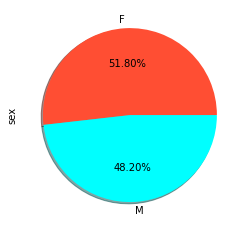

In [105]:
# em gráfico
cores = ['#ff4e33', '#00FFFF']
df_students.sex.value_counts().plot(kind = 'pie', autopct = '%.2f%%', shadow = True, colors = cores)

**QUANTIDADE** DE ESTUDANTES QUE FIZERAM e NÃO FIZERAM **CURSO PREPARATÓRIO**

In [107]:
# quantidade de cursos preparatórios
df_students.groupby('test preparation course')['test preparation course'].count()

test preparation course
completed    358
none         642
Name: test preparation course, dtype: int64

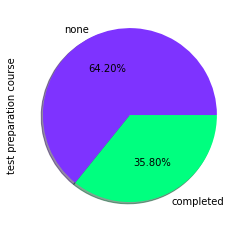

In [108]:
# em gráfico
cores = ['#7E33FF', '#00FF7F']
df_students['test preparation course'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', shadow = True, colors = cores)

## 4 - Figuras que mostrem insights sobre os dados com pandas e matplotlib:

GRAFICO COM RELAÇÃO A **PORCENTAGEM DOS GRUPOS**

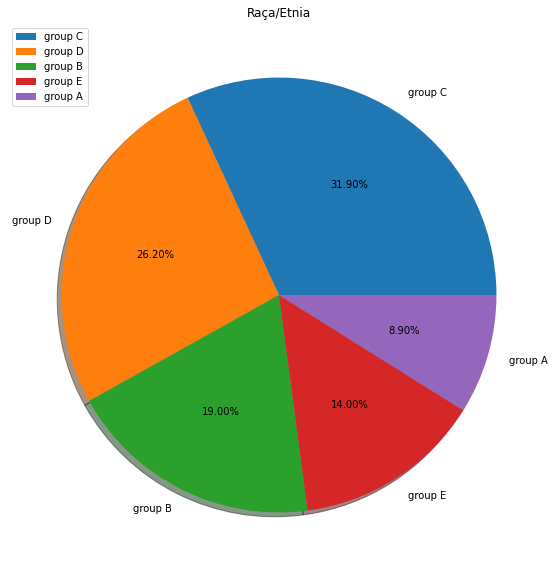

In [109]:
# gerando gráficos com porcentagem nos grupos
plt.figure(figsize = (20, 10))

x = df_students['race/ethnicity'].value_counts()

plt.pie(x, labels = x.index, autopct = '%.2f%%',  shadow = True)
plt.title('Raça/Etnia')
plt.legend(loc = 'upper left')
plt.savefig('/home/grupos.png', dpi = 300)
plt.show()


## REFERÊNCIA 

Disponível em: < https://www.kaggle.com/sonukumari47/students-performance-in-exams >